In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import VARMAX
from statsmodels.tsa.base.datetools import dates_from_str

## Constructing an Arma Model

In [11]:
df = pd.read_csv("Merged_data.csv")
df = df.loc[df["Country"]=="UNITED STATES"]
df["Log GDP"] = np.log(df["GDP"])
df.head()

,Country,Code,Year,avg_years_of_schooling,GDP,GENC,Population,Male Population,Female Population,Annual Growth Rate %,...,"Under Age 5 Mortality, Both Sexes","Under Age 5 Mortality, Males","Under Age 5 Mortality, Females",Crude Death Rate,"Deaths, both sexes",Net Migration Rate,"Net international migrants, both sexes",Fertility Rate,Dependency Ratio,Log GDP
3469,UNITED STATES,USA,1960,8.90,5.433000e+11,US,180671158,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.65,66.793151,27.020927
3470,UNITED STATES,USA,1965,9.82,7.437000e+11,US,194302963,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.91,67.041566,27.334904
3471,UNITED STATES,USA,1970,10.61,1.073303e+12,US,205052174,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.47,61.517115,27.701762
3472,UNITED STATES,USA,1975,11.40,1.684904e+12,US,215973199,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.77,55.178314,28.152730
3473,UNITED STATES,USA,1980,11.94,2.857307e+12,US,227224681,110398730.0,116825951.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.83,50.946063,28.680901


In [12]:
# Combine variables into a single DataFrame
variables = ['Log GDP', 'avg_years_of_schooling']#,'Fertility Rate']
df_var = df[variables]

# Fit VARMAX model
model = VARMAX(df_var, order=(1, 0))
results = model.fit()



/home/acherpeski/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35254D+00    |proj g|=  2.45835D+02

At iterate    5    f=  1.10959D+00    |proj g|=  1.01962D+02

At iterate   10    f=  3.27543D-01    |proj g|=  3.59516D+01

At iterate   15    f= -3.28334D-01    |proj g|=  7.45191D+00

At iterate   20    f= -3.36720D-01    |proj g|=  2.10986D+00

At iterate   25    f= -4.11999D-01    |proj g|=  2.10487D+01

At iterate   30    f= -5.19526D-01    |proj g|=  8.71875D+00

At iterate   35    f= -5.62664D-01    |proj g|=  1.82030D+00

At iterate   40    f= -5.66824D-01    |proj g|=  1.03241D+00

At iterate   45    f= -5.67876D-01    |proj g|=  4.46195D+00

At iterate   50    f= -5.84650D-01    |proj g|=  1.21657D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number

/home/acherpeski/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/home/acherpeski/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


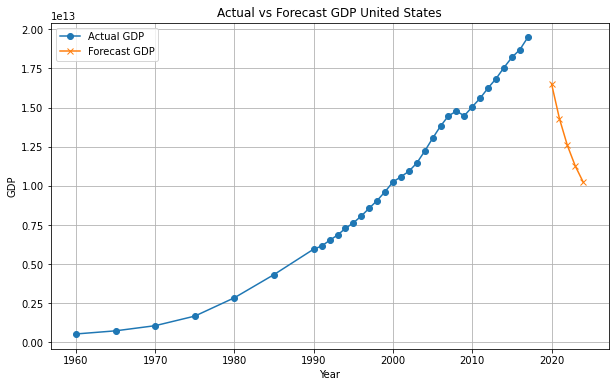

In [15]:
# Forecast GDP
forecast_steps = 5  # Number of steps ahead to forecast
forecast = results.forecast(steps=forecast_steps)

# Plot GDP predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], np.exp(df['Log GDP']), label='Actual GDP', marker='o')
plt.plot(range(2020, 2020+forecast_steps), np.exp(forecast['Log GDP']), label='Forecast GDP', marker='x')
plt.title('Actual vs Forecast GDP United States')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()
